In [47]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [58]:
EXPERIMENT_NAME = "experiment_06"
RESULTS_FILES = ["Q_table", "steps_per_episode", "reward_per_episode", "epsilon_per_episode",
                "reward_min_per_episode", "reward_max_per_episode", "reward_avg_per_episode"]


def read_csv_table(experiment_root: str, name: str) -> pd.DataFrame:
    """ Reads csv table with results """
    # Generate path to csv table
    csv_path = os.path.join(experiment_root, name + '.csv')
    # DataFrame with results
    df = pd.read_csv(csv_path, names=[name], header=None) 
    return df[name].tolist()


def read_experiment_results(experiment_name: str) -> tuple:
    """ Reads csv tables with results"""
    global EXPERIMENT_ROOT, RESULTS_FILES
    
    # Path to root directory
    experiment_root = f"./experiments/{experiment_name}"
    
    # Dictionary with results
    results = {file: read_csv_table(experiment_root, file) for file in RESULTS_FILES}
    
    return results


def moving_average(values: list, n=10) :
    ret = np.cumsum(values, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n


def visualize_results(res: dict, experiment_name: str, n: int = 20) -> None:
    
    # List of files
    files = [f for f in res.keys() if f.lower() != 'q_table']
    
    ncols = int(len(files) ** 0.5)
    nrows = len(files) // ncols + (1 if len(files) % ncols else 0)
    
    fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(14,16))
    ax = axes.ravel()
    plt.suptitle(experiment_name)
    for i, file in enumerate(files):
        ax[i].plot(res[file])
        ax[i].plot(moving_average(res[file], n=n))
        ax[i].legend(['original', f'moving average (n={n})'])
        ax[i].set_title(file)
        ax[i].set_xlabel("episodes")
        ax[i].set_ylabel("value")

# Experiment 00

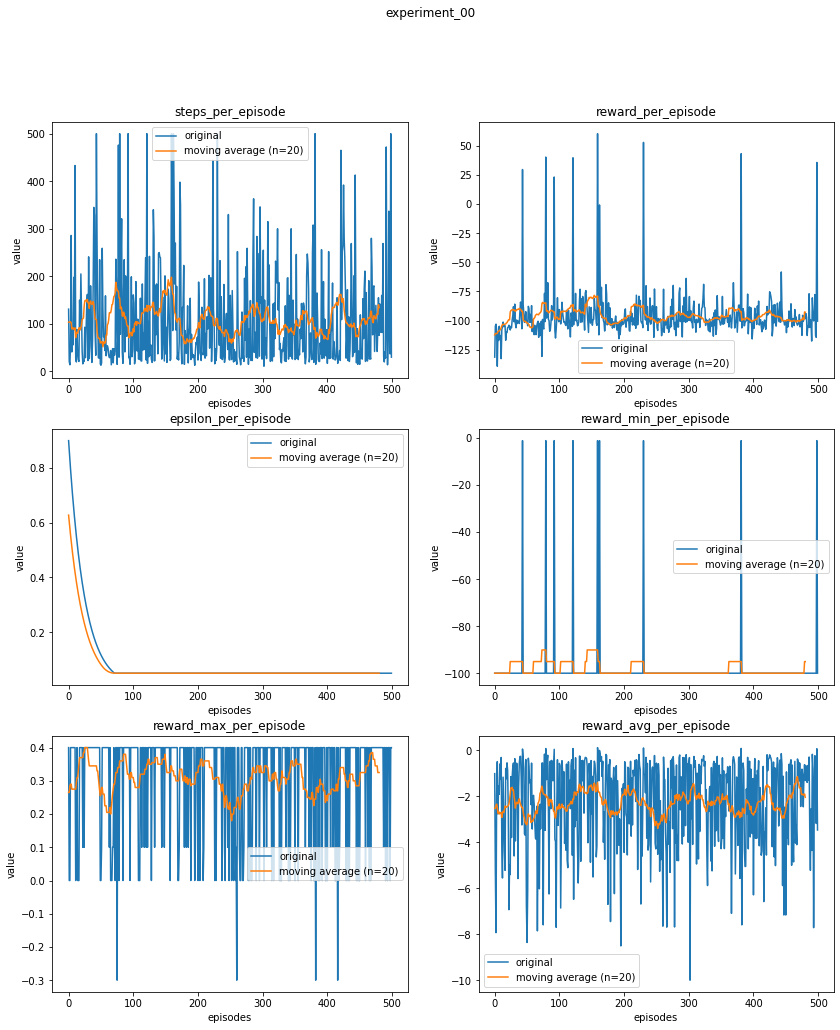

In [60]:
EXPERIMENT_NAME = "experiment_00"
results = read_experiment_results(experiment_name=EXPERIMENT_NAME)
visualize_results(results, experiment_name=EXPERIMENT_NAME)

# Experiment 01

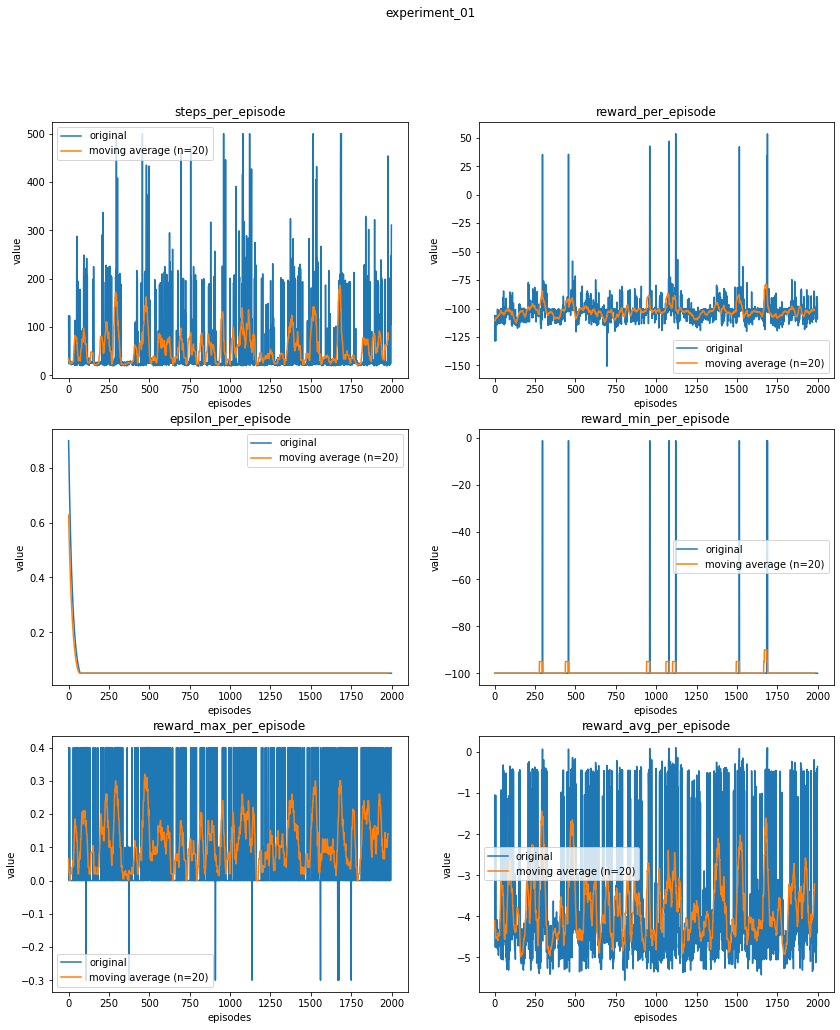

In [61]:
EXPERIMENT_NAME = "experiment_01"
results = read_experiment_results(experiment_name=EXPERIMENT_NAME)
visualize_results(results, experiment_name=EXPERIMENT_NAME)